![](https://snag.gy/h9Xwf1.jpg)

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to `pandas`

_Authors: Tim Book_

---

`pandas` is the most popular python package for managing datasets and is used extensively by data scientists.

### Learning Objectives

- Define the anatomy of DataFrames.
- Explore data with DataFrames.
- Practice plotting with pandas.

### Lesson Guide

- What is `pandas`?
- Reading data
- Exploring data
    - Filtering
    - Sorting
- Split-Apply-Combine
- Missing Values

<a id='introduction'></a>

### What is `pandas`?

---

- Data analysis library - **Panel data system** (doesn't actually have to do with the animal, sorry).
- Created by Wes McKinney and Open Sourced by AQR Capital Management, LLC 2009.
- Implemented in highly optimized Python/Cython.
- Most ubiquitous tool used to start data analysis projects within the Python scientific ecosystem.


### Pandas Use Cases

---

- Cleaning data / Munging
- Exploratory Data Analysis (EDA)
- Structuring data for plots or tabular display
- Joining disparate sources
- Filtering, extracting, or transforming 

## Importing the Dynamic Trio
From here on out, we'll begin pretty much all of our notebooks with the following three imports.

* **pandas**: The library we'll be using to do pretty much all data manipulation.
* **numpy**: The library we'll need to do various other computations. Even if you don't think you'll need it to start, you'll probably end up using it later.
* **matplotlib**: The library we'll use most for plotting. More on this another day.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Discussion: Where do you think a data scientist spends most of their time?

`/poll "Where do you think a data scientist spends most of their time?" "Moving data" "Cleaning data" "Exploring data" "Plotting data" "Predictive modeling" anonymous limit 1`

<a id='loading_csvs'></a>

### Loading a csv into a DataFrame

---

Pandas can load many types of files, but one of the most common filetypes for storing data is in a `.csv` file. Let's load a dataset on UFO sightings from the `./datasets` directory:

In [2]:
%pwd

'C:\\Users\\micha\\DSI\\1.07-intro-to-pandas'

In [2]:
ufo = pd.read_csv('datasets/ufo.csv')
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43


In [4]:
type(ufo)

pandas.core.frame.DataFrame

This creates a pandas object called a **DataFrame**. These are powerful containers for data with many built-in functions to explore and manipulate data.

We will barely scratch the surface of DataFrame functionality in this lesson, but over the course of this class you will become an expert at using them.

<a id='exploring_data'></a>

## Exploratory Data Analysis (EDA) with Python!

---

DataFrames come with built-in functionality that makes data exploration easy. 

Let's start by looking at the "head" of your data with the `.head()` built-in function. If run alone in a notebook cell, it will show you the first and last handful of columns and the first 5 rows.

In [7]:
ufo.head(10)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


If we want to see the last part of our data, we can equivalently use the ```.tail()``` function.

In [8]:
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
80538,Neligh,NaN,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,NaN,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,NaN,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43
80542,Loughman,NaN,LIGHT,FL,9/5/2014 5:30


<a id='data_dimensions'></a>

### Data dimensions

---

It's good to look at what the dimensions of your data are. The ```.shape``` property will tell you the rows and colum counts of your DataFrame.

In [10]:
ufo.shape

(80543, 5)

`/poll "In terms of rows, is this the largest dataset you've ever worked with?" "Yes" "No" "Not sure, but I'm not impressed anyway" anonymous limit 1`

You will notice that this is operates the same as `.shape` for numpy arrays/matricies. Pandas makes use of numpy under the hood for optimization and speed.

Look at the names of your columns with the ```.columns``` property.

In [11]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

Accessing a specific column is easy. You can use the bracket syntax just like python dictionaries with the string name of the column to extract that column.

In [15]:
ufo['City']

0                      Ithaca
1                 Willingboro
2                     Holyoke
3                     Abilene
4        New York Worlds Fair
                 ...         
80538                  Neligh
80539            Uhrichsville
80540                  Tucson
80541             Orland park
80542                Loughman
Name: City, Length: 80543, dtype: object

In [16]:
# Try to refrain from doing this...
# THREAD: Why shouldn't you rely on this? (There are several good reasons).

ufo.State

0        NY
1        NJ
2        CO
3        KS
4        NY
         ..
80538    NE
80539    OH
80540    AZ
80541    IL
80542    FL
Name: State, Length: 80543, dtype: object

As you can see we can also use the ```.head()``` function on a single column, which is represented as a pandas Series object.

You can also access a column (as a DataFrame instead of a Series) or multiple columns with a list of strings.

In [17]:
ufo[['City', 'State']]

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
...,...,...
80538,Neligh,NE
80539,Uhrichsville,OH
80540,Tucson,AZ
80541,Orland park,IL


In [ ]:
ufo.head()

<a id='dataframe_series'></a>

### DataFrame vs. Series

---

We've been playing with them, so I guess we should define them formally:

* A **`Series`** is a one-dimensional array of values **with an index**.
* A **`DataFrame`** is a two-dimensional array of values **with both a row and column index**.
* It turns out - each column of a `DataFrame` is actually a `Series`!

![](./assets/series-vs-df.png)

There is an important difference between using a list of strings and just a string with a column's name: when you use a list with the string it returns another **DataFrame**, but when you use just the string it returns a pandas **Series** object.

In [ ]:
print(type(ufo['City']))
print(type(ufo[['City']]))

In [19]:
ufo["City"] + ' Is awesome' #vectorization
ufo.fillna('Unkown Color')

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,Unkown Color,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,Unkown Color,OTHER,NJ,6/30/1930 20:00
2,Holyoke,Unkown Color,OVAL,CO,2/15/1931 14:00
3,Abilene,Unkown Color,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,Unkown Color,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
80538,Neligh,Unkown Color,CIRCLE,NE,9/4/2014 23:20
80539,Uhrichsville,Unkown Color,LIGHT,OH,9/5/2014 1:14
80540,Tucson,RED BLUE,Unkown Color,AZ,9/5/2014 2:40
80541,Orland park,RED,LIGHT,IL,9/5/2014 3:43


<a id='info'></a>

### Examining your data with `.info()`

---

The `.info()` should be the first thing you look at when getting acquainted with a new dataset.

**Types** are very important.  They impact the way data will be represented in our machine learning models, how data can be joined, whether or not math operators can be applied, and when you can encounter unexpected results.

> _Typical problems when working with new datasets_:
> - Missing values
> - Unexpected types (string/object instead of int/float)
> - Dirty data (commas, dollar signs, unexpected characters, etc)
> - Blank values that are actually "non-null" or single white-space characters

`.info()` is a function that is available on every **DataFrame** object. It gives you information about:

- Name of column / variable attribute
- Type of index (RangeIndex is default)
- Count of non-null values by column / attribute
- Type of data contained in column / attribute
- Unqiue counts of dtypes (Pandas data types)
- Memory usage of our dataset


In [20]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             80496 non-null  object
 1   Colors Reported  17034 non-null  object
 2   Shape Reported   72141 non-null  object
 3   State            80543 non-null  object
 4   Time             80543 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


## Aside:  Working with "Big Data"

---

The term **Big Data** has become a little bit of a buzzword with no clear, consensus definition. The most common definition is that **Big Data are data that are too big to fit in your computer's memory.**

![](https://snag.gy/UGNamo.jpg)

The reason that this definition is good is because when your data size exceeds your RAM, you have to use a separate set of tools to solve your problems. For example:

* Spark (Week 7!)
* Hadoop
* Being clever with how you read and use data
    - Separate it into small chunks for example.

<a id='describe'></a>

## Quick Summaries

---

The `.describe()` function is very useful for taking a quick look at your data. It gives you some of the basic descriptive statistics.

You can use `.value_counts()` to get a good tabular view of a categorical variable.

In [3]:
# Let's read in the diamonds data set.
diamonds = pd.read_csv('datasets/diamonds.csv')
diamonds.head()
diamonds.shape


(53940, 10)

In [26]:
# Let's describe the price
diamonds['price'].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [30]:
# We can even do it to the whole DataFrame - what does that look like?
# What's missing?

diamonds.describe(include = 'all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


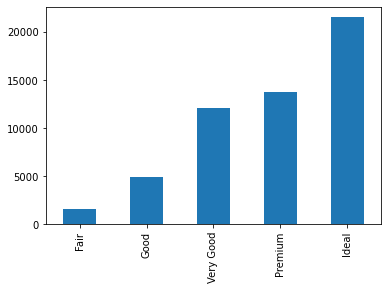

In [33]:
# Let's count up the cuts
diamonds['cut'].value_counts()[::-1].plot.bar()

Text(0.5, 1.0, 'Distribtion of Price')

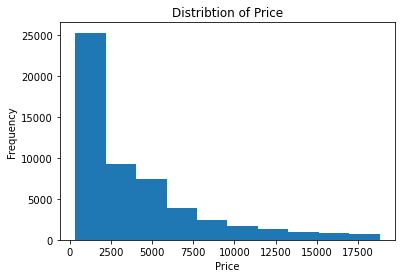

In [38]:
diamonds['price'].plot.hist();
plt.xlabel("Price");
plt.title('Distribtion of Price')

In [ ]:
# Let's do the same thing, but normalized

```.describe()``` gives us these statistics:

- **count**, which is equivalent to the number of cells (rows)
- **mean**, the average of the values in the column
- **std**, which is the standard deviation
- **min**, the minimum value
- **25%**, the 25th percentile of the values 
- **50%**, the 50th percentile of the values, which is the equivalent to the median
- **75%**, the 75th percentile of the values
- **max**, the maximum value

There are built-in math functions that will work on all of the columns of a DataFrame at once, or subsets of the data.

I can use the `.mean()` function on the `ufo` DataFrame to get the mean for every column.

In [40]:
diamonds.price.mean()

3932.799721913237

In [41]:
diamonds.price.std()

3989.4397381463023

In [42]:
diamonds.price.quantile(0.25)

950.0

<a id='independent_practice'></a>

### Now you!

---

Now that we know a little bit about basic DataFrame use, let's practice on a new dataset.

> Pro tip:  You can use the "tab" key to browse filesystem resources when your cursor is in a string to get a relative reference to the files that can be loaded in Jupyter notebook.  Remember, you have to use your arrow keys to navigate the files populated in the UI. 

<img src="https://snag.gy/IlLNm9.jpg">

1. Read in the `cars.csv` dataset. (call it `cars`)
1. What is the mean `mpg` for cars in this dataset?

In [9]:
cars = pd.read_csv('datasets/cars.csv')

cars['mpg'].mean()

20.090624999999996

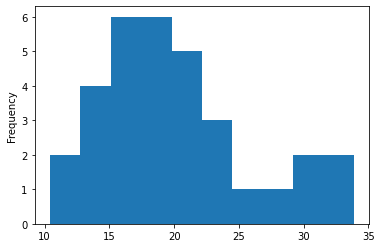

In [8]:
cars.mpg.plot.hist();

## Filtering
We usually don't need to operate on the _whole_ dataset. A very common task is to parse it down to only the pieces we need.

In [10]:
cars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [11]:
v = np.array([12, 98, 9, 50, 23])

In [12]:
# What do you think the result of this cell is?
v[[True, False, True, False, True]]

array([12,  9, 23])

In [13]:
# How about this?
v < 40

array([ True, False,  True, False,  True])

In [14]:
# So...
v[v < 40]

array([12,  9, 23])

In [15]:
# And this?
cars['mpg'] > 30

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18     True
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27     True
28    False
29    False
30    False
31    False
Name: mpg, dtype: bool

In [16]:
# Finally...
cars[cars['mpg'] > 30]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
27,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


Filtering in pandas uses vectors of booleans to describe inclusion or exclusion. `True` means you're in, `False` means you're out.

In [17]:
# This functions identically to the code above, and can sometimes feels a little cleaner.
# Variables that serve this function are sometimes called "masks"

cars.query('mpg > 30')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
27,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


### Multiple Filters
Often we want to filter based on multiple conditions. We can use the usual "and" and "or" logic, but the symbols change for mystical (read: annoying) Python reasons.

In [23]:
# "And" logic - use ampersand (&)
# Note parentheses mandatory!

cyl4 = cars['cyl'] == 4
wt_over3=  cars['wt'] > 3

cars[cyl4 & wt_over3]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
7,24.4,4,146.7,62,3.69,3.19,20.0,1,0,4,2
8,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2


In [25]:
cars[(cars['cyl'] == 4) & (cars['wt'] > 3)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
7,24.4,4,146.7,62,3.69,3.19,20.0,1,0,4,2
8,22.8,4,140.8,95,3.92,3.15,22.9,1,0,4,2


In [26]:
# "Or" logic - use pipe (|)
cars[(cars['cyl'] == 4) | (cars['wt'] > 3)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4
10,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
11,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3


### Now you:

In [29]:
# (THREAD): Show me all the UFO sightings in your hometown! (City and State)
# Anything interesting?

ufo[(ufo['City'] == 'Tacoma') & (ufo['State'] == 'WA')]

,City,Colors Reported,Shape Reported,State,Time
62,Tacoma,NaN,OTHER,WA,6/30/1947 0:00
199,Tacoma,NaN,SPHERE,WA,7/5/1952 16:00
210,Tacoma,NaN,SPHERE,WA,7/25/1952 16:00
454,Tacoma,NaN,DISK,WA,9/15/1957 23:00
1419,Tacoma,NaN,OTHER,WA,6/5/1967 14:00
...,...,...,...,...,...
77969,Tacoma,NaN,OTHER,WA,6/2/2014 11:00
78027,Tacoma,ORANGE,OVAL,WA,6/5/2014 22:00
78102,Tacoma,NaN,OTHER,WA,6/8/2014 15:00
79092,Tacoma,NaN,LIGHT,WA,7/6/2014 10:20


### Aside: Some shortcuts

In [30]:
cars[cars['mpg'].between(24, 30)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
7,24.4,4,146.7,62,3.69,3.190,20.0,1,0,4,2
25,27.3,4,79.0,66,4.08,1.935,18.9,1,1,4,1
26,26.0,4,120.3,91,4.43,2.140,16.7,0,1,5,2


In [31]:
cars[~cars['mpg'].between(14, 31)]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
17,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
19,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
23,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4


In [32]:
ufo[ufo['City'].isin(['Towaco', 'Montville'])]

,City,Colors Reported,Shape Reported,State,Time
1585,Towaco,NaN,CIRCLE,NJ,5/20/1968 19:00
29123,Montville,NaN,VARIOUS,OH,6/10/2004 21:00
34461,Montville,NaN,CONE,OH,10/20/2005 20:00
45630,Towaco,NaN,TRIANGLE,NJ,8/13/2008 1:00
55349,Montville,NaN,DISK,CT,11/10/2010 19:40
71134,Towaco,NaN,OVAL,NJ,7/15/2013 22:00


<a id='indexing'></a>

## Pandas Indexing: `.loc` and `.iloc`

---

So far we've learned how to select both rows and columns. The savvy and skeptical student would have noticed a problem here. We have ambiguous notation! What does this do:

```python
data[something]
```

We can't tell! Is `something` a mask or a string? One selects rows, the other selects columns. **What if we wanted to filter rows and select columns at the same time?!**

Pandas has two properties that you can use for indexing:

- **`.loc`** indexes with the _labels_ for rows and columns axis.
- **`.iloc`** indexes with the _integer positions_ for rows and columns axis.
> There used to be a third, `.ix` which is now deprecated and shan't ever be used again.

## `.loc` is Most Common
The syntax of `.loc` is pretty intuitive:

```python
data.loc[rows, columns]
```

Where `rows` is often a filter (ie, a **mask**), and `columns` is a list of columns, or even just `:` to select all columns.

In [35]:
cars.loc[1,'wt']

cars.loc[cars['wt'] > 3, ['wt', 'cyl']]

cars.loc[:,['wt', 'cyl']] # all rows

,wt,cyl
0,2.620,6
1,2.875,6
2,2.320,4
3,3.215,6
4,3.440,8
5,3.460,6
6,3.570,8
7,3.190,4
8,3.150,4
9,3.440,6


### Acccctually.....
![](assets/actually.png)
According to **_The Zen of Python_**, explicit is better than implicit. `.loc` is explicit. **Most people choose to always use `.loc` instead of the ambiguous `data[something]` notation! This is a pretty good idea! When in doubt, use `.loc`!**

### `.iloc` is rare, but useful
The `i` stands for "integer" and will give you the actual zero-indexed numerical indices.

In [36]:
prizes = pd.Series(['sticker', 'top', 'ruler'], index=[100, 200, 300])
prizes

100    sticker
200        top
300      ruler
dtype: object

In [39]:
prizes.iloc[0]
prizes.loc[100]

'sticker'

## Sorting

In [ ]:
# We can sort individual Series...

In [46]:
cars.mpg.sort_values(ascending = False)
cars.mpg.sort_index(ascending = False)

31    21.4
30    15.0
29    19.7
28    15.8
27    30.4
26    26.0
25    27.3
24    19.2
23    13.3
22    15.2
21    15.5
20    21.5
19    33.9
18    30.4
17    32.4
16    14.7
15    10.4
14    10.4
13    15.2
12    17.3
11    16.4
10    17.8
9     19.2
8     22.8
7     24.4
6     14.3
5     18.1
4     18.7
3     21.4
2     22.8
1     21.0
0     21.0
Name: mpg, dtype: float64

In [49]:
# Or the entire DataFrame
cars.sort_values(['mpg', 'disp'], ascending = [True, False])

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
23,13.3,8,350.0,245,3.73,3.840,15.41,0,0,3,4
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
16,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
30,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
22,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
13,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3
21,15.5,8,318.0,150,2.76,3.520,16.87,0,0,3,2
28,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4


### Now You:

In [52]:
ufo.Time = pd.to_datetime(ufo.Time)
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             80496 non-null  object        
 1   Colors Reported  17034 non-null  object        
 2   Shape Reported   72141 non-null  object        
 3   State            80543 non-null  object        
 4   Time             80543 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 3.1+ MB


In [57]:
# Give me the 5 most recent UFO sightings in Roswell, New Mexico.
# You'll need to filter and use .sort_values()
# This is a hard one!

roswell_ufo = ufo[(ufo['City'] == 'Roswell') & (ufo["State"] == "NM")]

roswell_ufo.sort_values('Time', ascending = False).head()

,City,Colors Reported,Shape Reported,State,Time
80459,Roswell,ORANGE,CIRCLE,NM,2014-09-01 20:00:00
80056,Roswell,NaN,OTHER,NM,2014-08-18 15:00:00
67040,Roswell,NaN,FLASH,NM,2012-11-08 22:30:00
58960,Roswell,NaN,LIGHT,NM,2011-09-04 19:50:00
55978,Roswell,NaN,EGG,NM,2011-01-16 14:30:00


## Split-Apply-Combine

---

What if we want summary statistics _with respect to some categorical variable?_ For example, the price of a diamond probably varies widely between different diamond cuts. To tackle this problem, we'll use the **Split-Apply-Combine** technique. (This is sometimes called **MapReduce**, but is more of a special case of MapReduce). 

* **Split**: Separate your data into different DataFrames, one for each category.
* **Apply**: On each split-up DataFrame, apply some function or transformation (for example, the mean).
* **Combine**: Take the results and combine the split-up DataFrames back into one aggregate DataFrame.

This might sound complicated, but it's actually only two commands in pandas (the **Combine** step is done for us).

In [62]:
# What is the mean price by diamond cut?

diamonds.groupby('cut').mean()['price']
diamonds.groupby('cut')['price'].mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

In [64]:
# Can we just describe each price by cut?
diamonds.groupby('cut')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
cut,,,,,,,,
Fair,1610.0,4358.757764,3560.386612,337.0,2050.25,3282.0,5205.50,18574.0
Good,4906.0,3928.864452,3681.589584,327.0,1145.00,3050.5,5028.00,18788.0
Ideal,21551.0,3457.541970,3808.401172,326.0,878.00,1810.0,4678.50,18806.0
Premium,13791.0,4584.257704,4349.204961,326.0,1046.00,3185.0,6296.00,18823.0
Very Good,12082.0,3981.759891,3935.862161,336.0,912.00,2648.0,5372.75,18818.0


In [65]:
# What if I want my own recipe of statistics?
diamonds.groupby('cut')['price'].agg(['mean', 'median', 'std'])

,mean,median,std
cut,,,
Fair,4358.757764,3282.0,3560.386612
Good,3928.864452,3050.5,3681.589584
Ideal,3457.541970,1810.0,3808.401172
Premium,4584.257704,3185.0,4349.204961
Very Good,3981.759891,2648.0,3935.862161


### Now You:
What is the mean miles per gallon for each cylinder size?

In [66]:
cars.groupby('cyl')['mpg'].mean()

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

### Advanced Split-Apply-Combining
Feel free to skip!

In [67]:
# What if I want my own home-spun aggregate function?

# Maybe the mean of the log-price is interesting to you?
def log_mean(p):
    return np.mean(np.log(p))

diamonds.groupby('cut')['price'].agg(['count', 'mean', log_mean])

,count,mean,log_mean
cut,,,
Fair,1610,4358.757764,8.093441
Good,4906,3928.864452,7.842809
Ideal,21551,3457.541970,7.639467
Premium,13791,4584.257704,7.950795
Very Good,12082,3981.759891,7.798664


In [ ]:
# What if I want functions of different columns?
diamonds.groupby('cut').agg({
    'price': {'count': 'count', 'price_mean': 'mean'},
    'carat': {'carat_mean': 'mean'}
})

## Adding, Dropping, Renaming, and `inplace` Methods

In [69]:
# Adding a column is easy, just define it!
# What if I wanted km per gal instead of miles per gal?

cars['kmpg'] = cars['mpg'] * 1.61
cars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,kmpg
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,33.810
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,33.810
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,36.708
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,34.454
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,30.107
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,29.141
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,23.023
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,39.284
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,36.708
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,30.912


In [71]:
# Oops - that actually doesn't make sense since they'd be using liters anyway.
# Let's drop it.

cars.drop(columns = 'kmpg')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
# But... it's not gone?

###  Inplace Methods!
There are several methods in pandas that don't "stick" unless you tell them to. These methods will always have `inplace=False` by default. If you want to run a method and have it "stick" - assign `inplace=True`.

For example...

### Renaming Columns

In [ ]:
# Yuck - I hate spaces and capital letters
ufo.head()

In [74]:
# Lowercaseifying is easy:
# The "columns" attribute of a DataFrame works just like a numpy array or Series.

ufo.columns = [col.lower().replace(' ', '_') for col in ufo.columns]
ufo

,city,colors_reported,shape_reported,state,time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
80538,Neligh,NaN,CIRCLE,NE,2014-09-04 23:20:00
80539,Uhrichsville,NaN,LIGHT,OH,2014-09-05 01:14:00
80540,Tucson,RED BLUE,NaN,AZ,2014-09-05 02:40:00
80541,Orland park,RED,LIGHT,IL,2014-09-05 03:43:00


In [76]:
# The .rename method
ufo = ufo.rename(columns = {'colors_reported': 'colors',
                     'shape_reported': 'shape'})

ufo.columns

Index(['city', 'colors', 'shape', 'state', 'time'], dtype='object')

### Aside: `str` and `dt` methods
There are a lot of familiar string and date operations we can perform on columns. Strangely, they exist within a pandas submodule and so have to be prefixed with `str` and `dt` respectively.

In [77]:
ufo['shape'].str.lower().head()

0    triangle
1       other
2        oval
3        disk
4       light
Name: shape, dtype: object

In [78]:
ufo['shape'].str.replace('O', 'BRO').head()

0    TRIANGLE
1     BROTHER
2      BROVAL
3        DISK
4       LIGHT
Name: shape, dtype: object

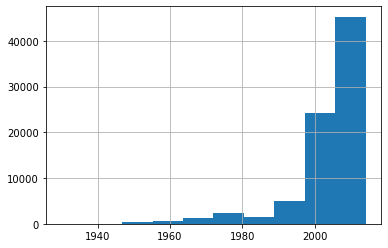

In [82]:
# We already did this above, but datetime variables need to be converted specially.
# ufo['time'] = pd.to_datetime(ufo['time'])
ufo['time'].dt.year.head()
ufo['time'].dt.year.hist();

## Missing Values

In [83]:
s = pd.Series([5, 7, np.nan, 2, 10])

In [84]:
s.fillna(100)

0      5.0
1      7.0
2    100.0
3      2.0
4     10.0
dtype: float64

In [85]:
# Hmm...
ufo.fillna({'colors': 'unknown'})

,city,colors,shape,state,time
0,Ithaca,unknown,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,unknown,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,unknown,OVAL,CO,1931-02-15 14:00:00
3,Abilene,unknown,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,unknown,LIGHT,NY,1933-04-18 19:00:00
...,...,...,...,...,...
80538,Neligh,unknown,CIRCLE,NE,2014-09-04 23:20:00
80539,Uhrichsville,unknown,LIGHT,OH,2014-09-05 01:14:00
80540,Tucson,RED BLUE,NaN,AZ,2014-09-05 02:40:00
80541,Orland park,RED,LIGHT,IL,2014-09-05 03:43:00


In [ ]:
# Easy way to filter out missings!

## Exporting Data
We can read data, but how do we save it so we can send it out? pandas has several methods of the form `.to_*()`.

In [87]:
cars.to_csv('new_cars.csv')

<a id='review'></a>

### Review

---

 - What would we do with a dataset when we first acquire it?
 - What's important to consider when first looking at a dataset? 
 - What are some common problems we can run into with new data?
 - What are some common operations with DataFrames?
 - How do we slice? Index? Filter?

# EXTRA MATERIALS
![](assets/biohazard.png)
Everything that follows is considered advanced or "too much" for our first session with pandas, and may not be explicitly covered by the instructor. If the instructor _does_ cover it, please don't worry that you don't understand this on your first pass.

**THAT DOES NOT MEAN THESE TOPICS ARE UNIMPORTANT OR RARELY USED!** We highly _highly_ recommend you take a look at these on your own time.

### Merging

In [ ]:
movies = pd.read_csv(
    'datasets/movies.tbl',
    sep='|',
    encoding='latin1',
    header=None,
    names=['movie_id', 'title'],
    usecols=[0, 1]
)
movies.head()

In [ ]:
ratings = pd.read_csv(
    'datasets/movie_ratings.tsv',
    sep='\t',
    header=None,
    names=['user_id', 'movie_id', 'rating', 'timestamp']
)
ratings.head()

In [ ]:
movie_reviews = pd.merge(ratings, movies, how='left')
movie_reviews.head()

In [ ]:
print(movies.shape)
print(ratings.shape)
print(movie_reviews.shape)

### "Categorical" Variables
Despite the name, when pandas says "Categorical", they really mean "Ordinal" - that is, ordered categories.

For example, check out the following crosstab:

In [ ]:
pd.crosstab(diamonds['cut'], diamonds['color'])

The "cuts" are not in the right order! They're actually in alphabetical order. We can fix this by telling pandas that there really is an important ordering here.

In [ ]:
diamonds['cut'] = pd.Categorical(diamonds['cut'], categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
pd.crosstab(diamonds['cut'], diamonds['color'])

### Categorizing with `.map()`

In [ ]:
cars['cyl_word'] = cars['cyl'].map({4: 'Four', 6: 'Six', 8: 'Eight'})
cars['cyl_word'].value_counts()

In [ ]:
def is_efficient(x):
    if x > 20:
        return "Efficient"
    else:
        return "Wasteful"
    
cars['fuel_economy'] = cars['mpg'].map(is_efficient)
cars['fuel_economy'].value_counts()

### Advanced Data Manipulation with `.apply()`
The `.apply()` method is very similar to `.map()`, except more advanced. You can apply a function along any axis of a `DataFrame`. `.apply()` is our "Swiss army knife" for data manipulation - if something can't be solved with ordinary means, it might be time for a `.apply()`.

In [ ]:
sizes = pd.Series([8, 4, 5, 'L', 2, 12, 16, 8, 'XL'])

In [ ]:
def to_num(x):
    try:
        out = float(x)
    except:
        out = np.nan
    return out

In [ ]:
sizes.apply(to_num)

In [ ]:
cars.head()

In [ ]:
def describe_car(row):
    efficiency = row['fuel_economy'].lower()
    cyl = row['cyl_word'].lower()
    auto = 'automatic' if row['am'] == 1 else 'manual'
    print(f"This {cyl} cylinder car has {auto} transmission and a(n) {efficiency} fuel economy.")

In [ ]:
cars.head().apply(describe_car, axis=1)

BONUS QUESTION: Why are there 5 "None" valus in the above output?